<a href="https://colab.research.google.com/github/sds-capstone/2022-09-proj7-women-at-table/blob/main/Country_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd
# import pipe
import numpy as np
import seaborn as sns
import plotnine as p9
import matplotlib.pyplot as plt

In [12]:
file = 'https://raw.githubusercontent.com/sds-capstone/2022-09-proj7-women-at-table/main/findex_SubSahAfrica.csv'
df = pd.read_csv(file, index_col=0)
print(f'There are {df.shape[0]} entries and {df.shape[1]} features')
df.head()

There are 35000 entries and 105 features


,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
12138,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,143101339,1.909609,1,60.0,1.0,1,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
12139,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,123998301,2.075761,1,45.0,1.0,1,...,4,4,4,4.0,3,1.0,0.0,NaN,0.0,NaN
12140,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,157155643,0.785666,1,27.0,3.0,4,...,4,4,4,4.0,4,2.0,1.0,1.0,0.0,0.0
12141,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,155618899,1.450568,2,24.0,1.0,2,...,4,4,4,4.0,3,5.0,0.0,NaN,0.0,NaN
12142,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,143861320,0.461588,1,22.0,1.0,5,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN


[Text(0.5, 1.0, 'Distribution of Participants per Country')]

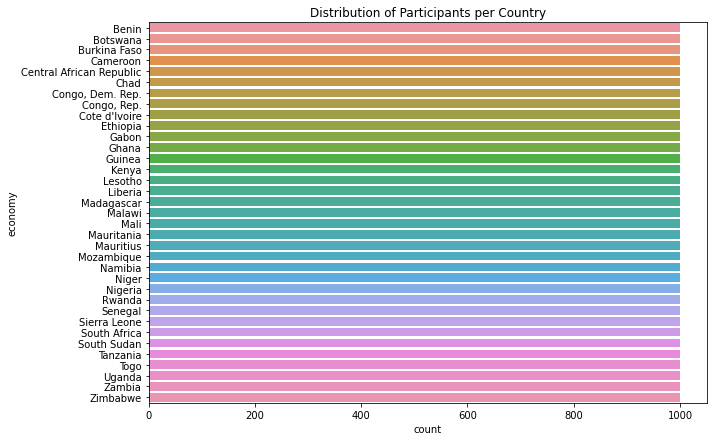

In [26]:
df2 = df

# Number of Observations per Country

plt.rcParams["figure.figsize"] = (10,7)
sns.countplot(y = 'economy', data = df2).set(title = "Distribution of Participants per Country")


[Text(0.5, 1.0, 'Distribution of Participants per Region')]

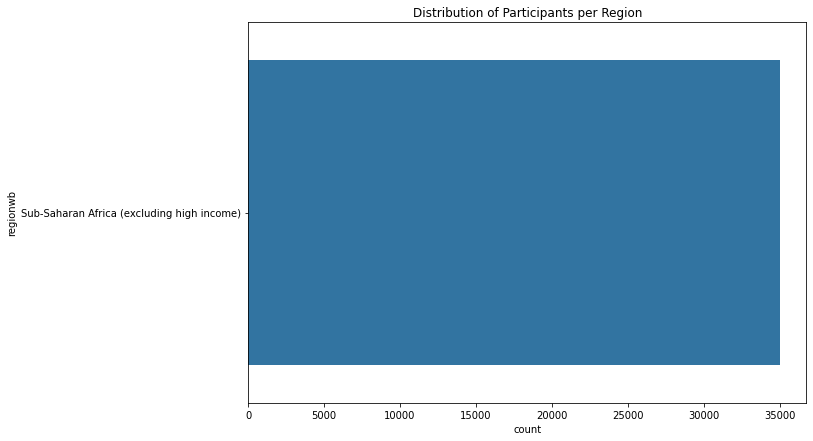

In [30]:
# Number of Observations per Region

sns.countplot(y = 'regionwb', data = df2).set(title = "Distribution of Participants per Region")

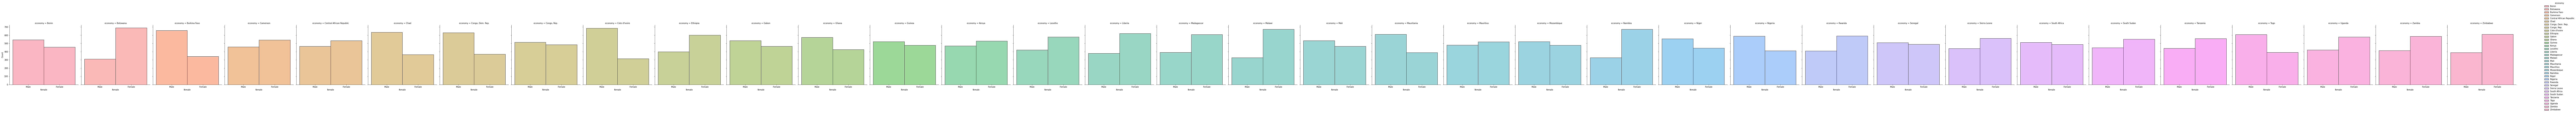

In [24]:
# recode female values 

df2.loc[df2['female'] == 1, "female"] = 'Male'
df2.loc[df2['female'] == 2, "female"] = 'Female'

sns.displot(x="female", col= "economy", hue= "economy", data=df2)

[Text(0.5, 1.0, 'Percent of Participants with Access to Emergency Funds by Country')]

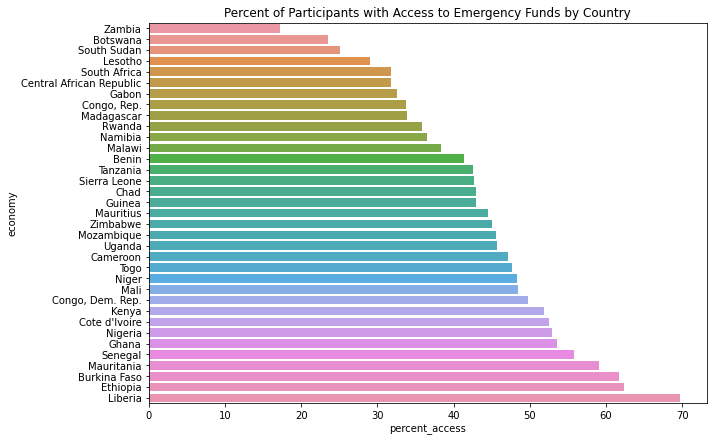

In [116]:
df3 = df2

#Assign Categories fin24 - "Possiblity of Coming Up with Emergency Funds"
df3.loc[df3['fin24'] == 1, "fin24"] = 'Possible'
df3.loc[df3['fin24'] == 2, "fin24"] = 'Not Possible'
df3.loc[df3['fin24'] == 3, "fin24"] = 'Don\'t Know'
df3.loc[df3['fin24'] == 4, "fin24"] = 'Refuse'

# Counting by Access to Emergency Funds by country
access = df3[['fin24', 'economy']].query("fin24 == 'Possible'").groupby('economy').count()
no_access = df3[['fin24', 'economy']].query("fin24 != 'Possible'").groupby('economy').count()

# Defining acccess vs no access by country columms
a_count = access['fin24']
no_a_count = no_access['fin24']

# Merging columns
df4 = pd.merge(a_count, no_a_count, how='inner', on = 'economy').assign(total = lambda df4: df4['fin24_x']+df4['fin24_y'])
df4 = df4.assign(percent_access = lambda df4: (df4['fin24_x']/df4["total"])*100)

df4['economy'] = df3.economy.unique()

# Visualize
sns.barplot(data = df4.sort_values('percent_access'), y = "economy", x = "percent_access").set(title = "Percent of Participants with Access to Emergency Funds by Country")


[Text(0.5, 1.0, 'Distribution of Participants with Access to Emergency Funds by Gender')]

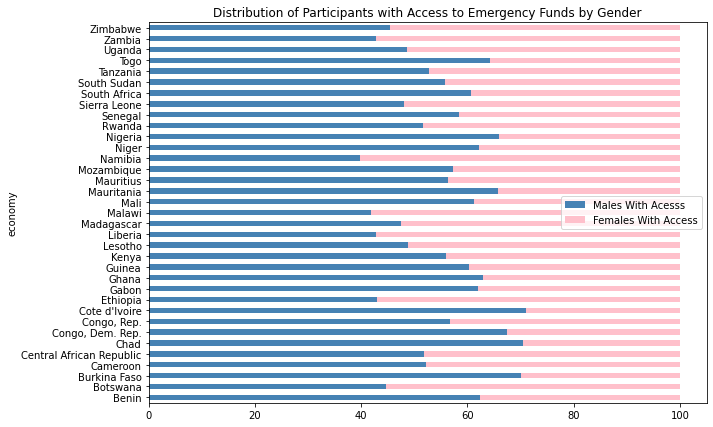

In [132]:
# Counting by Access to Emergency Funds by gender
f_access = df3[['fin24', 'economy', 'female']].query("fin24 == 'Possible' & female == 'Female'").groupby('economy').count()
m_access = df3[['fin24', 'economy', 'female']].query("fin24 == 'Possible'& female != 'Female'").groupby('economy').count()

# Defining acccess vs no access by country columms
f_count = f_access['fin24']
m_count = m_access['fin24']

# Merging columns
df5 = pd.merge(f_count, m_count, how='inner', on = 'economy')
df5 = df5.assign(total = lambda df4: df4['fin24_x']+df4['fin24_y'])

#Percent of females with access
df5 = df5.assign(f_percent_access = lambda df5: (df5['fin24_x']/df5["total"])*100)

#Percent of males with access
df5 = df5.assign(m_percent_access = 100 - df5['f_percent_access'])

df5['economy'] = df3.economy.unique()
df5 = df5[['m_percent_access', 'f_percent_access', 'economy']]
df5 = df5.rename(columns = {'m_percent_access':'Males With Acesss', 'f_percent_access': 'Females With Access'})

# Visualize
df5.set_index('economy').plot(kind='barh', stacked=True, color=['steelblue', 'pink']).set(title = "Distribution of Participants with Access to Emergency Funds by Gender")